# Linear Regression with one variable

### The concept of Linear Regression


<b> Linear regression </b> is a concept that is used for predicting continuous outcome variable (commonly denoted as y, also called as a dependent variable). Linear regression assumes linear relationship between the variables, so any changes in x variable will be associated with constant change in y variable.

Standard linear equation:
$$ y = a x + b $$

We will be making a function $ h(x) $ that tries to reassemble the relationship between y and x:
$$ h(x) = a x + b $$

where $ h(x) ∼ y $.

It's important to remember that a and b are unknown to us - it's our model's job to find their values so that h(x) will be as similar to y as possible. Function <b> h </b> is what we call a <b> hypothesis function </b>, <b> a and b </b> are known as <b> model parameters </b> and $ x_1, x_2, ..., x_n $ are known as <b> input features </b>.

Model parameters are generally denoted with a greek letter $ \theta $ with an appropriate index. They make a vector:

$$
\theta = \left [
\begin{matrix}
\theta_0 \\
\theta_1
\end{matrix}
\right ]
$$

Therefore the linear equation:
$$ y = a x + b $$

becomes:
$$ h_\theta (x) = \theta_0 + \theta_1 x_1 $$

where:

$$ y ∼ h_\theta (x) , $$
$$ a ∼ \theta_1 , $$
$$ b ∼ \theta_0 , $$
$$ x^n ∼ x_n . $$


### Cost function

<b> Cost function </b>, also know as loss function or objective function, measures how well a machine learning model performs on a dataset. It quantifies the difference between the actual values and the values given by our model. The goal during the training process is to minimize the cost function as much as possible.

<b> Mean Squared Error </b> (MSE) is commonly used as a cost function. It calculated the mean difference between the output values and the actual values:

$$ MSE = J( \theta ) = \frac{1}{m} \sum_{i=1}^m ( h_\theta (x^{(i)}) - y^{(i)})^2 $$

where m is equivalent to the size of training set, e.g. if we had 50 examples in our training set (with output variables $ y^{1}, y^{2},..., y^{50} $), then our model made 50 predictions ( $ h_\theta (x^{(1)}), h_\theta (x^{(2)}),..., h_\theta (x^{(50)} $) and so we calculate the <b> mean squared difference </b> between them.

Now that we can measure how good our model is, we adjust model parameters so that MSE is as low as possible:

$$ \hat \theta = \text{argmin}_\theta J(\theta) $$

We usually minimize cost function by trying to find its <b>local minimum</b>.

### Finding local minimum using Gradient Descent

<b> Gradient Descent </b> is an optimization algorithm used to find a local minimum of a cost function, which minimizes cost function during the training of a model, which makes the model more accurate. The idea is to iteratively update the parameters of the model in the direction of steepest descent of the cost function. In a nutshell, the steps of Gradient Descent algorithm are:

1. Initialize the model with a starting set of parameters
2. Calculate the gradient with respect to each parameter
3. Update parameters of the model in the direction opposite to the gradient
$$ \text {New Parameter} = \text {Old Parameter} - \text {Learning Rate} × \text {Gradient} $$

In each iteration, we're updating model parameters as such:

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $$

Where $ \alpha $ is the learning rate which dictates how fast the algorithm is adapting.

$$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{2}{m} \sum_{i=1}^m ( h_\theta (x^{(i)}) - y^{(i)}) x_j^{(i)} $$

If \alpha is too small, Gradient Descent will take a long time to process.
If \alpha is too big, Gradient Descent might never find local minimum and can become unstable.

Let's take a look at our linear model equation:
$$ h_\theta (x) = \theta_0 + \theta_1 x_1 $$

It follows a pattern of $ \theta_j + x_j $, however there is no $ x_0 $. It's because $ x_0 = 1 $, so we don't need to write it in our equation, but knowing this lets us simplify our expression for $ \theta_0 $:

$$ \theta_0 := \theta_0 - \frac{2}{m} \sum_{i=1}^m ( h_\theta (x^{(i)}) - y^{(i)}) * 1 $$

Expression for $ \theta_1 $:

$$ \theta_1 := \theta_1 - \frac{2}{m} \sum_{i=1}^m ( h_\theta (x^{(i)}) - y^{(i)}) * x_1^{(i)} $$

Every parameter is updated at the same time. We repeat the steps as long as:

$$ \epsilon \leqslant J(\theta) $$

where $ \epsilon $ is the stopping condition. In practice, reducing cost function using Gradient Descent will produce effect reassembling asymptote, which mean if will never actually be 0, so we're introducing an artificial value that acts as us saying the algorithm is "good enough".

### Implementing Linear Regression with one variable using sklearn

Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Load data to dataframe:

In [2]:
data = pd.read_csv("Salary_Data.csv", names=["Experience", "Salary"], skiprows=1)
data.head(10)

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Data displayed on scatter plot, where salary is the independent variable (values or columns which help to predict the dependent variable) and experience is the dependent variable (values which are to be predicted):

<Axes: xlabel='Experience', ylabel='Salary'>

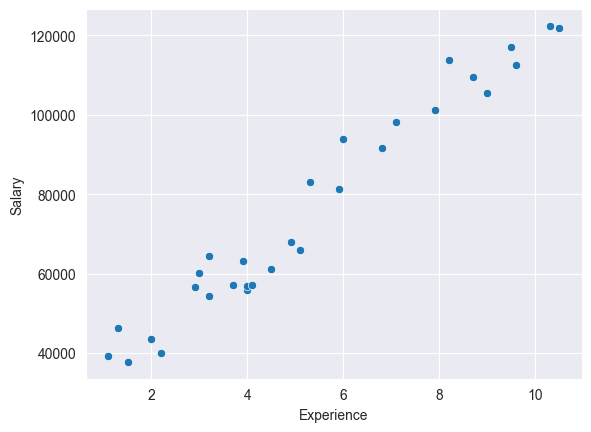

In [3]:
sns.scatterplot(data=data, y="Salary", x="Experience")

Extract dataframe columns and convert them into numpy arrays:

In [4]:
y = data.Salary.values
x = data.Experience.values

Since numbers representing salaries are fairly big, we can represent them in terms of 10 thousands:

In [5]:
y = y / 10000

Reshape x-array (-1 is used as a placeholder for unknown dimension, 1 means there's 1 column):

In [6]:
x = x.reshape(-1, 1)

Split data into training set and test set:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

Create linear regression model and fit data into it:

In [8]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

Use trained model to make predictions:

In [9]:
predictions = regr.predict(X_test)

Calculate mean squared error:

In [10]:
mse = mean_squared_error(y_test, predictions)
mse

0.43144969582827924

Calculate the $R^2$ score between the actual and predicted values:

In [11]:
regr.score(X_test, y_test)

0.940087016255447

In [12]:
def one_variable_scatter_plot(draw_line=False):
    sns.scatterplot(x=X_test.squeeze(), y=y_test, label='Actual values', color='black')
    sns.scatterplot(x=X_test.squeeze(), y=predictions, label='Predicted values', color='blue')
    if draw_line:
        sns.regplot(x=x.squeeze(), y=y, scatter_kws={"color": "black"}, line_kws={"color": "blue"})

    plt.ylabel('Salary (1:10000)')
    plt.xlabel('Experience (years)')
    plt.show()

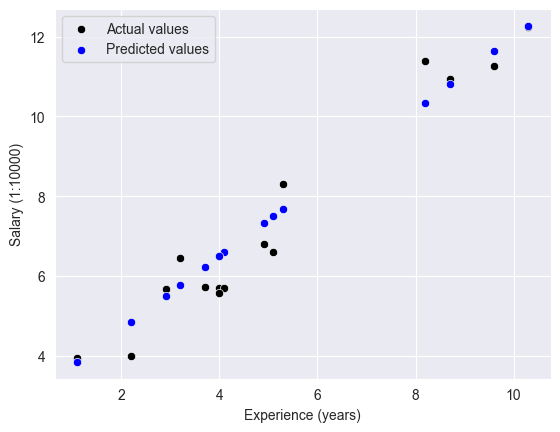

In [13]:
one_variable_scatter_plot()

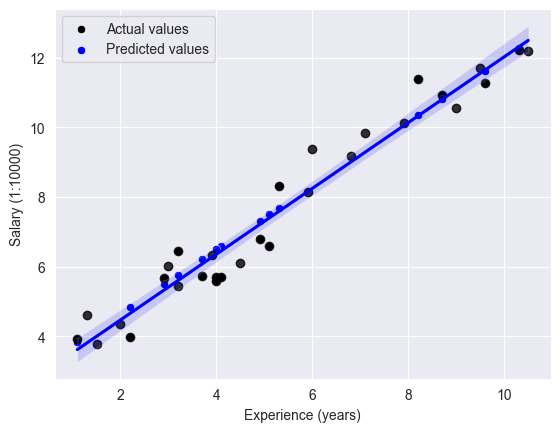

In [14]:
one_variable_scatter_plot(True)